In [ ]:
#importing the gpm library and defining the configurations for downloading data from Earthdata
import gpm
username_earthdata = "********"
password_earthdata = "********"
base_dir = r"F:\new_gpm\GPM"  # On Windows: "C:\\Users\\<path\\to\\a\directory>\\GPM"
gpm.define_configs(
    username_earthdata=username_earthdata,
    password_earthdata=password_earthdata,
    base_dir=base_dir,
)

Saved .netrc, .urs_cookies, and .dodsrc to: C:\Users\Admin\
The GPM-API config file has been updated successfully!


In [ ]:
# Checking the available products for the specified product types
gpm.available_products(product_types="RS") 

['1A-GMI',
 '1A-TMI',
 '1B-GMI',
 '1B-Ka',
 '1B-Ku',
 '1B-PR',
 '1B-TMI',
 '1C-AMSR2-GCOMW1',
 '1C-AMSRE-AQUA',
 '1C-AMSUB-NOAA15',
 '1C-AMSUB-NOAA16',
 '1C-AMSUB-NOAA17',
 '1C-ATMS-NOAA20',
 '1C-ATMS-NOAA21',
 '1C-ATMS-NPP',
 '1C-GMI',
 '1C-GMI-R',
 '1C-MHS-METOPA',
 '1C-MHS-METOPB',
 '1C-MHS-METOPC',
 '1C-MHS-NOAA18',
 '1C-MHS-NOAA19',
 '1C-SAPHIR-MT1',
 '1C-SSMI-F08',
 '1C-SSMI-F10',
 '1C-SSMI-F11',
 '1C-SSMI-F13',
 '1C-SSMI-F14',
 '1C-SSMI-F15',
 '1C-SSMIS-F16',
 '1C-SSMIS-F17',
 '1C-SSMIS-F18',
 '1C-SSMIS-F19',
 '1C-TMI',
 '2A-AMSR2-GCOMW1',
 '2A-AMSR2-GCOMW1-CLIM',
 '2A-AMSRE-AQUA-CLIM',
 '2A-AMSUB-NOAA15-CLIM',
 '2A-AMSUB-NOAA16-CLIM',
 '2A-AMSUB-NOAA17-CLIM',
 '2A-ATMS-NOAA20',
 '2A-ATMS-NOAA20-CLIM',
 '2A-ATMS-NOAA21',
 '2A-ATMS-NOAA21-CLIM',
 '2A-ATMS-NPP',
 '2A-ATMS-NPP-CLIM',
 '2A-DPR',
 '2A-ENV-DPR',
 '2A-ENV-Ka',
 '2A-ENV-Ku',
 '2A-ENV-PR',
 '2A-GMI',
 '2A-GMI-CLIM',
 '2A-GPM-SLH',
 '2A-Ka',
 '2A-Ku',
 '2A-MHS-METOPA',
 '2A-MHS-METOPA-CLIM',
 '2A-MHS-METOPB',
 '2A-MHS-MET

In [ ]:
# Checking the available products for the specified product categories
gpm.available_products(product_categories="IMERG")

['IMERG-ER', 'IMERG-FR', 'IMERG-LR']

In [ ]:
# Checking the available products for the specified product levels
gpm.available_products(product_levels="1C")

['1C-AMSR2-GCOMW1',
 '1C-AMSRE-AQUA',
 '1C-AMSUB-NOAA15',
 '1C-AMSUB-NOAA16',
 '1C-AMSUB-NOAA17',
 '1C-ATMS-NOAA20',
 '1C-ATMS-NOAA21',
 '1C-ATMS-NPP',
 '1C-GMI',
 '1C-GMI-R',
 '1C-MHS-METOPA',
 '1C-MHS-METOPB',
 '1C-MHS-METOPC',
 '1C-MHS-NOAA18',
 '1C-MHS-NOAA19',
 '1C-SAPHIR-MT1',
 '1C-SSMI-F08',
 '1C-SSMI-F10',
 '1C-SSMI-F11',
 '1C-SSMI-F13',
 '1C-SSMI-F14',
 '1C-SSMI-F15',
 '1C-SSMIS-F16',
 '1C-SSMIS-F17',
 '1C-SSMIS-F18',
 '1C-SSMIS-F19',
 '1C-TMI']

In [3]:
#importing the necessary libraries for data manipulation and visualization
import datetime

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
#import ximage  # noqa'

# importing the necessary libraries for geospatial operations
import gpm
from gpm.utils.geospatial import (
    get_circle_coordinates_around_point,
    get_country_extent,
)

In [4]:
#installing the ximage library for visualizing the data
! pip install ximage
import ximage  # noqa

In [ ]:
# Define the start and end time for the data to be downloaded
start_time = datetime.datetime.strptime("2021-12-05 00:00:00", "%Y-%m-%d %H:%M:%S")
end_time = datetime.datetime.strptime("2021-12-07 00:30:00", "%Y-%m-%d %H:%M:%S")

# Specify the product and product type
product = "IMERG-FR"  # 'IMERG-ER' 'IMERG-LR'
product_type = "RS"  # "NRT"
storage = "GES_DISC"  # "LOCAL"
# Specify the version
version = 7

In [ ]:
# Download the data
gpm.download(
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
    storage=storage,
    force_download=False,
    verbose=True,
    progress_bar=True,
    check_integrity=False,
)

100%|██████████| 2/2 [00:05<00:00,  2.83s/it]

194 files has been download.
All the available GPM IMERG-FR product files are now on disk.


: 

In [5]:
#The gpm.open_granule_dataset(filepath) opens a single granule into a xarray.Dataset object by providing the path of the file of interest.

dataset = gpm.open_granule_dataset(r"F:\new_gpm\GPM\RS\V07\IMERG\IMERG-FR\2025\08\11\3B-HHR.MS.MRG.3IMERG.20250811-S000000-E002959.0000.V07B.HDF5")

In [6]:
dataset

<xarray.Dataset> Size: 259MB
Dimensions:                         (lonv: 2, lon: 3600, latv: 2, lat: 1800,
                                     time: 1, nv: 2)
Coordinates:
  * lon                             (lon) float32 14kB -179.9 -179.9 ... 179.9
  * lat                             (lat) float32 7kB -89.95 -89.85 ... 89.95
  * time                            (time) datetime64[ns] 8B 2025-08-11T00:30:00
    lon_bnds                        (lonv, lon) float32 29kB dask.array<chunksize=(2, 3600), meta=np.ndarray>
    lat_bnds                        (latv, lat) float32 14kB dask.array<chunksize=(2, 1800), meta=np.ndarray>
    time_bnds                       (time, nv) datetime64[ns] 16B 2025-08-11 ...
    crsWGS84                        int64 8B 0
Dimensions without coordinates: lonv, latv, nv
Data variables:
    precipitation                   (time, lat, lon) float32 26MB dask.array<chunksize=(1, 1800, 145), meta=np.ndarray>
    randomError                     (time, lat, lon) float32 26MB dask.array<chunksize=(1, 1800, 145), meta=np.ndarray>
    probabilityLiquidPrecipitation  (time, lat, lon) float32 26MB dask.array<chunksize=(1, 1800, 291), meta=np.ndarray>
    precipitationQualityIndex       (time, lat, lon) float32 26MB dask.array<chunksize=(1, 1800, 145), meta=np.ndarray>
    MWprecipitation                 (time, lat, lon) float32 26MB dask.array<chunksize=(1, 1800, 145), meta=np.ndarray>
    MWprecipSource                  (time, lat, lon) float32 26MB dask.array<chunksize=(1, 1800, 291), meta=np.ndarray>
    MWobservationTime               (time, lat, lon) float32 26MB dask.array<chunksize=(1, 1800, 291), meta=np.ndarray>
    IRprecipitation                 (time, lat, lon) float32 26MB dask.array<chunksize=(1, 1800, 145), meta=np.ndarray>
    IRinfluence                     (time, lat, lon) float32 26MB dask.array<chunksize=(1, 1800, 291), meta=np.ndarray>
    precipitationUncal              (time, lat, lon) float32 26MB dask.array<chunksize=(1, 1800, 145), meta=np.ndarray>
Attributes: (12/15)
    FileName:           3B-HHR.MS.MRG.3IMERG.20250811-S000000-E002959.0000.V0...
    MissingData:        
    DOI:                10.5067/GPM/IMERG/3B-HH/07
    DOIauthority:       http://dx.doi.org/
    AlgorithmID:        3IMERGHH
    AlgorithmVersion:   3IMERGH_7.0
    ...                 ...
    ProcessingSystem:   PPS
    DataFormatVersion:  7e
    MetadataVersion:    7e
    ScanMode:           Grid
    history:            Created by ghiggi/gpm_api software on 2026-02-13 04:1...
    gpm_api_product:    IMERG-FR

In [7]:
#looking explicitly at the data variables present in the dataset
dataset.data_vars


Data variables:
    precipitation                   (time, lat, lon) float32 26MB dask.array<chunksize=(1, 1800, 145), meta=np.ndarray>
    randomError                     (time, lat, lon) float32 26MB dask.array<chunksize=(1, 1800, 145), meta=np.ndarray>
    probabilityLiquidPrecipitation  (time, lat, lon) float32 26MB dask.array<chunksize=(1, 1800, 291), meta=np.ndarray>
    precipitationQualityIndex       (time, lat, lon) float32 26MB dask.array<chunksize=(1, 1800, 145), meta=np.ndarray>
    MWprecipitation                 (time, lat, lon) float32 26MB dask.array<chunksize=(1, 1800, 145), meta=np.ndarray>
    MWprecipSource                  (time, lat, lon) float32 26MB dask.array<chunksize=(1, 1800, 291), meta=np.ndarray>
    MWobservationTime               (time, lat, lon) float32 26MB dask.array<chunksize=(1, 1800, 291), meta=np.ndarray>
    IRprecipitation                 (time, lat, lon) float32 26MB dask.array<chunksize=(1, 1800, 145), meta=np.ndarray>
    IRinfluence         

In [8]:
#Looking about the data
for i in dataset.data_vars:
    print(i, ":", dataset[i].data)

precipitation : dask.array<transpose, shape=(1, 1800, 3600), dtype=float32, chunksize=(1, 1800, 145), chunktype=numpy.ndarray>
randomError : dask.array<transpose, shape=(1, 1800, 3600), dtype=float32, chunksize=(1, 1800, 145), chunktype=numpy.ndarray>
probabilityLiquidPrecipitation : dask.array<transpose, shape=(1, 1800, 3600), dtype=float32, chunksize=(1, 1800, 291), chunktype=numpy.ndarray>
precipitationQualityIndex : dask.array<transpose, shape=(1, 1800, 3600), dtype=float32, chunksize=(1, 1800, 145), chunktype=numpy.ndarray>
MWprecipitation : dask.array<transpose, shape=(1, 1800, 3600), dtype=float32, chunksize=(1, 1800, 145), chunktype=numpy.ndarray>
MWprecipSource : dask.array<transpose, shape=(1, 1800, 3600), dtype=float32, chunksize=(1, 1800, 291), chunktype=numpy.ndarray>
MWobservationTime : dask.array<transpose, shape=(1, 1800, 3600), dtype=float32, chunksize=(1, 1800, 291), chunktype=numpy.ndarray>
IRprecipitation : dask.array<transpose, shape=(1, 1800, 3600), dtype=float32,

In [9]:
#If the array class is dask.Array, it means that the data are not yet loaded into RAM memory.
#  To put the data into memory, you need to call the method compute, either on the xarray object or on the numerical array.
dataset_precipitation = dataset["precipitation"].data
dataset_precipitation

dask.array<transpose, shape=(1, 1800, 3600), dtype=float32, chunksize=(1, 1800, 145), chunktype=numpy.ndarray>

In [10]:
dataset_precipitation.compute()

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]],
      shape=(1, 1800, 3600), dtype=float32)

In [11]:
type(dataset_precipitation)

dask.array.core.Array

In [12]:
dataset.time

<xarray.DataArray 'time' (time: 1)> Size: 8B
array(['2025-08-11T00:30:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time      (time) datetime64[ns] 8B 2025-08-11T00:30:00
    crsWGS84  int64 8B 0
Attributes:
    axis:                   T
    bounds:                 time_bnds
    standard_name:          time
    description:            End time of the accumulation period
    coverage_content_type:  coordinate

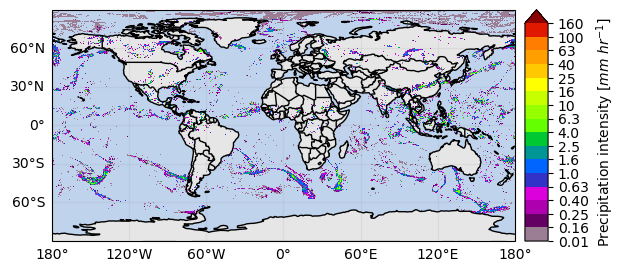

In [14]:
#ploting the gpm precipitation data on map
dataset["precipitation"].isel(time=0).gpm.plot_map() # With cartopy

c:\Users\Admin\miniconda3\envs\gpm-api-py311\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\Admin\miniconda3\envs\gpm-api-py311\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\Admin\miniconda3\envs\gpm-api-py311\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\Admin\miniconda3\envs\gpm-api-py311\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarn

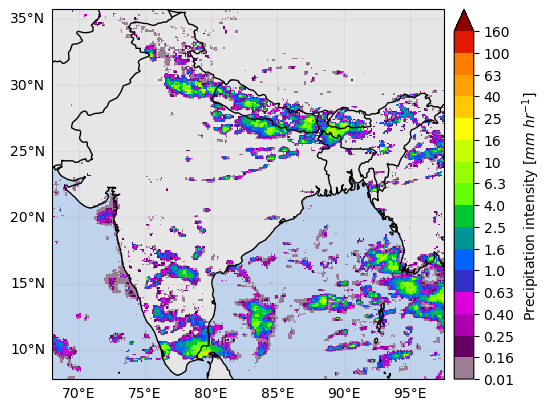

In [16]:
#Geospatial Manipulations
extent = get_country_extent("India")
ds_us = dataset.gpm.crop(extent=extent)
ds_us["precipitation"].isel(time=0).gpm.plot_map()

c:\Users\Admin\miniconda3\envs\gpm-api-py311\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\Admin\miniconda3\envs\gpm-api-py311\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\Admin\miniconda3\envs\gpm-api-py311\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\Admin\miniconda3\envs\gpm-api-py311\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarn

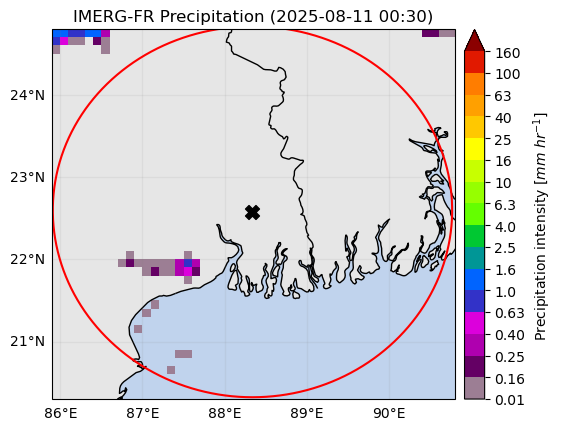

In [17]:
# Crop around a point (i.e. radar location)
lon = 88.34
lat = 22.58
distance = 250_000  # 250 km
ds_subset = dataset.gpm.crop_around_point(lon=lon, lat=lat, distance=distance)
da_subset = ds_subset["precipitation"].isel(time=0)
# Define ROI coordinates
circle_lons, circle_lats = get_circle_coordinates_around_point(
    lon,
    lat,
    radius=distance,
    num_vertices=360,
)

# Plot
p = da_subset.gpm.plot_map()
p.axes.set_title(da_subset.gpm.title(add_timestep=True))
p.axes.plot(circle_lons, circle_lats, "r-", transform=ccrs.Geodetic())
p.axes.scatter(lon, lat, c="black", marker="X", s=100, transform=ccrs.Geodetic())

In [18]:
da_subset.compute()

<xarray.DataArray 'precipitation' (lat: 45, lon: 49)> Size: 9kB
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.08      , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.79999995, 0.45999998, 0.16      , ..., 0.        , 0.        ,
        0.        ],
       [1.37      , 1.03      , 0.77      , ..., 0.19999999, 0.14999999,
        0.14      ]], shape=(45, 49), dtype=float32)
Coordinates:
  * lat       (lat) float32 180B 20.35 20.45 20.55 20.65 ... 24.55 24.65 24.75
  * lon       (lon) float32 196B 85.95 86.05 86.15 86.25 ... 90.55 90.65 90.75
    time      datetime64[ns] 8B 2025-08-11T00:30:00
    crsWGS84  int64 8B 0
Attributes:
    units:            mm/hr
    description:      Complete merged microwave-infrared (gauge-adjusted) pre...
    gpm_api_product:  IMERG-FR
    valid_min:        0
    valid_max:        1000
    gpm_api_decoded:  yes
    grid_mapping:     crsWGS84

In [19]:
da_subset.data

dask.array<getitem, shape=(45, 49), dtype=float32, chunksize=(45, 49), chunktype=numpy.ndarray>